MICROSOFT NEW MOVIE STUDIO 

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

QUESTIONS TO ANSWER

Some of the questions to figure out include:
1. What are the current top-grossing films at the box office?

Try to identify the highest-grossing movies to understand which genres or types of films are currently successful.

2. What genres dominate the box office?

Analyze the distribution of movie genres among the top-grossing films to determine which genres are most popular.

DATA

The data for this analysis is found in the Data folderwhich includes:
1. bom.movie_gross.csv
2. rt.movies_info.tsv
3. rt.reviews.tsv
4. tn.movie_budget.csv
5. tmdb.movies.csv

In [2]:
# import the libraries
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
# Reading the bom.movie_gross.csv file
grossing_df = pd.read_csv('./Data/tn.movie_budgets.csv.gz')
# Viewing the data in the file
grossing_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [32]:
# Defining the shape of the dataframe inorder to do data cleaning
# Getting the summary of the dataframe
grossing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
# Identifying the missing values 
# This gives the missing values as described above 
# and it will enable in making decisions on data cleaning
grossing_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
# Data cleaning

# converting the columns to numeric datatype
grossing_df['worldwide_gross'] = grossing_df['worldwide_gross'].astype(str)
grossing_df['worldwide_gross'] = grossing_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

grossing_df['production_budget'] = grossing_df['production_budget'].astype(str)
grossing_df['production_budget'] = grossing_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)

grossing_df['domestic_gross'] = grossing_df['domestic_gross'].astype(str)
grossing_df['domestic_gross'] = grossing_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)

grossing_df
# There should be no missing values making the DF cleaner

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [39]:
# Creating a new column that contains the total gross
grossing_df['total_gross'] = grossing_df['domestic_gross'] + grossing_df['worldwide_gross']
grossing_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00


In [40]:
# Create a new column for profits
grossing_df['profit_margins'] = grossing_df['total_gross'] - grossing_df['production_budget']
grossing_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit_margins
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.889770e+05,2.829770e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2.676000e+03,-2.324000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,-1.400000e+03


In [43]:
# Sort the dataframe by total_gross in descending order
top_grossing_movies = grossing_df.sort_values(by='total_gross', ascending=False)

top_grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit_margins
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.867572e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.301125e+09,2.086125e+09
...,...,...,...,...,...,...,...,...
4192,93,"Mar 15, 2011",A Shine of Rainbows,6000000.0,0.0,0.000000e+00,0.000000e+00,-6.000000e+06
4193,94,"Dec 31, 2011",Freaky Deaky,6000000.0,0.0,0.000000e+00,0.000000e+00,-6.000000e+06
4194,95,"May 10, 2011",The Hit List,6000000.0,0.0,0.000000e+00,0.000000e+00,-6.000000e+06
4856,57,"Nov 14, 2014",Always Woodstock,2400000.0,0.0,0.000000e+00,0.000000e+00,-2.400000e+06


Text(0.5, 1.0, 'Top 10 Grossing Movies')

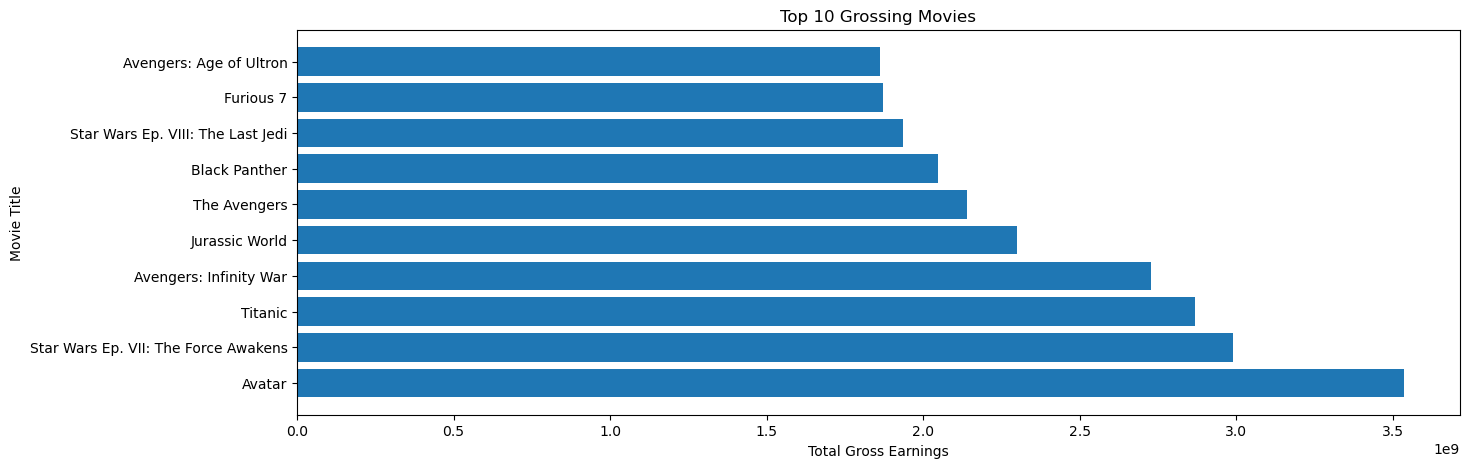

In [60]:
# importing the im.db database 
conn = sqlite3.connect('./Data/im.db')
query = "SELECT * FROM movie_basics"

# reading the query
movies_df = pd.read_sql_query(query, conn)
movies_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [63]:
# Merge 'top_grossing_df' and 'genres_df' on the 'movies' column
merged_df = top_grossing_movies.merge(movies_df, left_on='movie', right_on='primary_title', how='left')
top_grossing_with_genres = merged_df[['movie', 'genres']]
top_grossing_with_genres

,movie,genres
0,Avatar,Horror
1,Star Wars Ep. VII: The Force Awakens,NaN
2,Titanic,Adventure
3,Titanic,Family
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
...,...,...
7216,A Shine of Rainbows,NaN
7217,Freaky Deaky,"Comedy,Crime,Thriller"
7218,The Hit List,"Action,Thriller"
7219,Always Woodstock,"Comedy,Music,Romance"


In [77]:
# merging the data fames to create a new data frame with three columns 
merged_df = top_grossing_with_genres.merge(top_grossing_movies[['movie', 'total_gross']], left_on='movie', right_on='movie', how='left')
merged_df

,movie,genres,total_gross
0,Avatar,Horror,3.536853e+09
1,Star Wars Ep. VII: The Force Awakens,NaN,2.989973e+09
2,Titanic,Adventure,2.867572e+09
3,Titanic,Family,2.867572e+09
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2.726950e+09
...,...,...,...
7726,A Shine of Rainbows,NaN,0.000000e+00
7727,Freaky Deaky,"Comedy,Crime,Thriller",0.000000e+00
7728,The Hit List,"Action,Thriller",0.000000e+00
7729,Always Woodstock,"Comedy,Music,Romance",0.000000e+00


In [87]:
# Removing the rows with missing values
merged_df = merged_df.dropna()
# Removing any duplicates
merged_df = merged_df.drop_duplicates(subset='movie')
# Viewing the entries in the dataframe
merged_df.info()
merged_df.isnull().sum()
merged_df

<class 'pandas.core.frame.DataFrame'>
Index: 2299 entries, 0 to 7730
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie        2299 non-null   object 
 1   genres       2299 non-null   object 
 2   total_gross  2299 non-null   float64
dtypes: float64(1), object(2)
memory usage: 71.8+ KB


,movie,genres,total_gross
0,Avatar,Horror,3.536853e+09
2,Titanic,Adventure,2.867572e+09
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2.726950e+09
5,Jurassic World,"Action,Adventure,Sci-Fi",2.301125e+09
6,The Avengers,"Action,Adventure,Sci-Fi",2.141215e+09
...,...,...,...
7722,Icarus,"Documentary,Sport,Thriller",0.000000e+00
7727,Freaky Deaky,"Comedy,Crime,Thriller",0.000000e+00
7728,The Hit List,"Action,Thriller",0.000000e+00
7729,Always Woodstock,"Comedy,Music,Romance",0.000000e+00


Text(0.5, 1.0, 'Top 10 Grossing Movies')

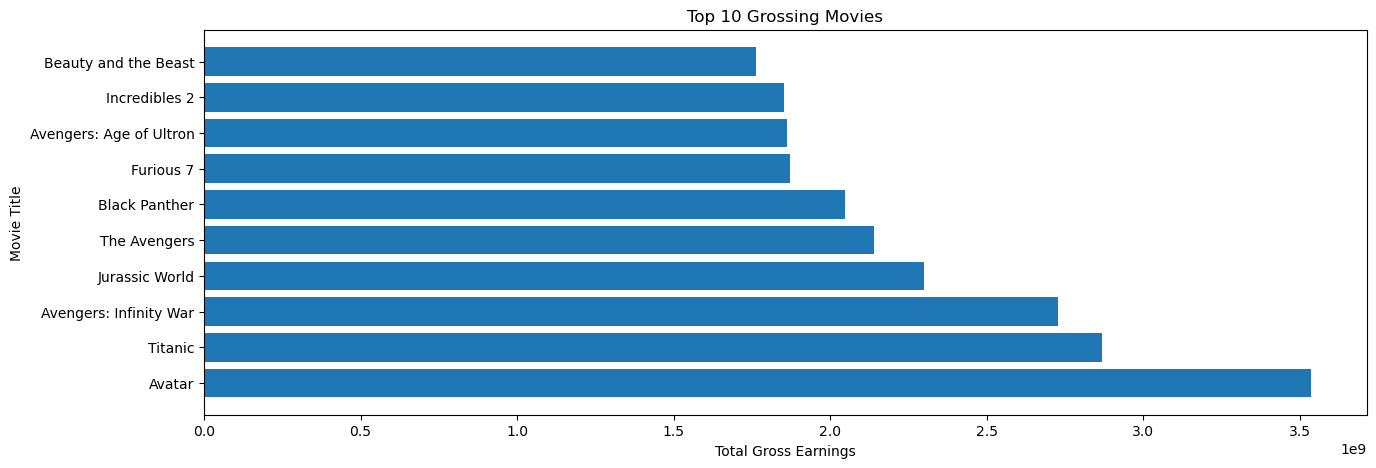

In [88]:
# Create a horizontal bar chart showing the top-grossing movies 
# Create a bar chart

top_movies_figure, ax = plt.subplots(figsize = (15, 5))
ax.barh(merged_df['movie'][:10], merged_df['total_gross'][:10])
ax.set_xlabel('Total Gross Earnings')
ax.set_ylabel('Movie Title')
ax.set_title('Top 10 Grossing Movies')

In [89]:
# Split the 'genres' column (assuming genres are separated by commas) and create a new DataFrame
genres_split = merged_df['genres'].str.split(',').explode()

# Use value_counts() to count the occurrences of each genre
genre_counts = genres_split.value_counts()
genre_counts

genres
Drama          1130
Comedy          664
Action          539
Adventure       410
Thriller        382
Crime           305
Horror          278
Romance         264
Documentary     182
Biography       177
Sci-Fi          172
Mystery         168
Fantasy         146
Family          132
Animation       121
Music            65
History          61
Sport            49
War              32
Musical          16
Western          16
News              1
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of Movies by Genre')

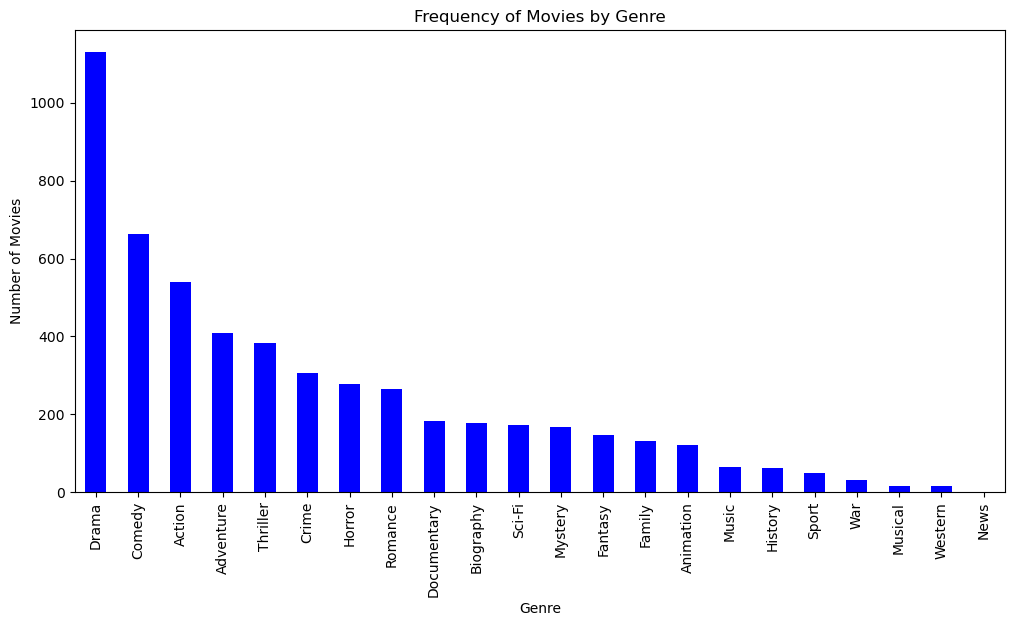

In [94]:
# Create a bar chart to visualize the frequency of movies by the genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='blue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movies by Genre')

genres
Action         [Avengers: Infinity War, Jurassic World, The A...
Adventure      [Titanic, Avengers: Infinity War, Jurassic Wor...
Animation      [Incredibles 2, Frozen, Finding Dory, Minions,...
Biography      [Inside Out, Bohemian Rhapsody, American Snipe...
Comedy         [Frozen, Finding Dory, Minions, Toy Story 3, J...
Crime          [Furious 7, The Fate of the Furious, Inside Ou...
Documentary    [Alice in Wonderland, Wonder Woman, Inside Out...
Drama          [Beauty and the Beast, Frozen, The Lion King, ...
Family         [Titanic, Beauty and the Beast, Beauty and the...
Fantasy        [Beauty and the Beast, Beauty and the Beast, B...
History        [Inside Out, Dunkirk, Home, Home, Lincoln, Lin...
Horror         [Avatar, It, Coco, Ghost, Ghost, World War Z, ...
Music          [Bohemian Rhapsody, Cinderella, A Star is Born...
Musical        [Beauty and the Beast, Beauty and the Beast, A...
Mystery        [The Hangover Part II, Ghost, Gone Girl, Prome...
News           [Th

Text(0.5, 1.0, 'Number of Movies per Genre')

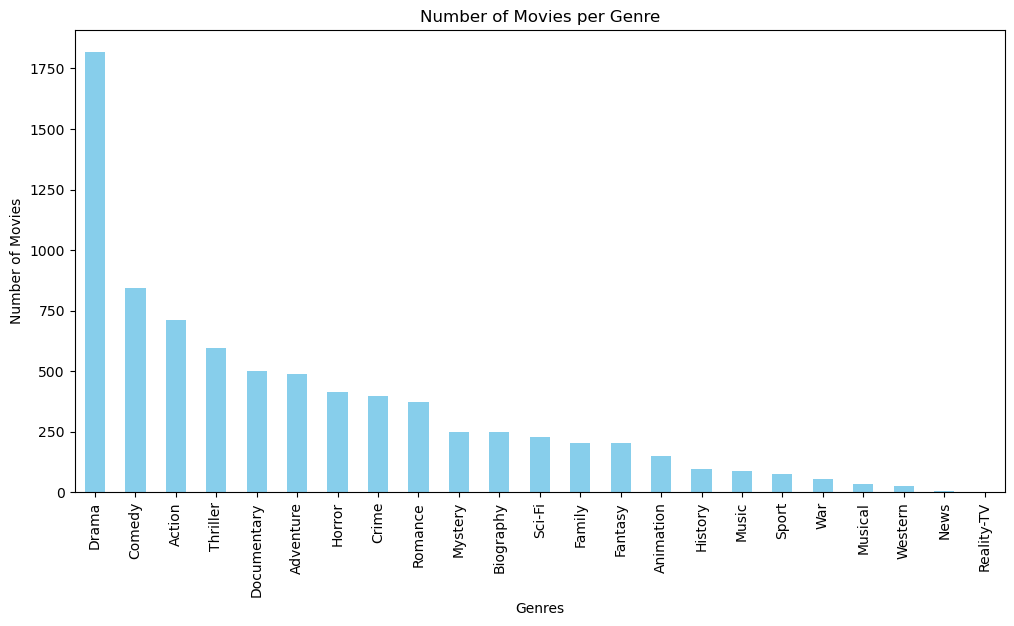

In [101]:
# Join the 'genres_split' DataFrame with 'top_grossing_with_genres' to associate genres with movies
merged_df = top_grossing_with_genres.join(genres_split, rsuffix='_genre')

# Group the data by genre and list the top-grossing movies in each genre
genre_movies = merged_df.groupby(genres_split)['movie'].apply(list)

# Display the list of genres with their top-grossing movies
print(genre_movies)

# Visualize the number of movies per genre
genre_counts = genres_split.value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')